#**Import required libraries**

In [49]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

#**Function to plot scatterplot**

In [50]:
def scatter_plot(x_axis_data, y_axis_data, x_label, y_label, figure_label):
    plt.scatter(x_axis_data, y_axis_data, alpha=.75,
                color='b')  # alpha helps to show overlapping data
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(figure_label)
    plt.show()

# **Read restaurant_data**

In [51]:
restaurant_data = pd.read_csv('/content/rest_data.csv')
print(restaurant_data)

      Id  City Group Type  P1   P2   P3  ...  P33  P34  P35  P36  P37  revenue
0      0  Big Cities   IL   4  5.0  4.0  ...    5    5    4    3    4  5653753
1      1  Big Cities   FC   4  5.0  4.0  ...    0    0    0    0    0  6923131
2      2       Other   IL   2  4.0  2.0  ...    0    0    0    0    0  2055379
3      3       Other   IL   6  4.5  6.0  ...    6   18   12   12    6  2675511
4      4       Other   IL   3  4.0  3.0  ...    2    3    4    3    3  4316715
..   ...         ...  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...      ...
132  132       Other   FC   2  3.0  3.0  ...    0    0    0    0    0  5787594
133  133  Big Cities   FC   4  5.0  4.0  ...    0    0    0    0    0  9262754
134  134       Other   FC   3  4.0  4.0  ...    0    0    0    0    0  2544857
135  135  Big Cities   FC   4  5.0  4.0  ...    0    0    0    0    0  7217634
136  136  Big Cities   FC   4  5.0  3.0  ...    0    0    0    0    0  6363241

[137 rows x 41 columns]


#**Print data information**

In [52]:
restaurant_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   City Group  137 non-null    object 
 2   Type        137 non-null    object 
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

#**Check skeweness of data**

Skew is: 2.793478695162504


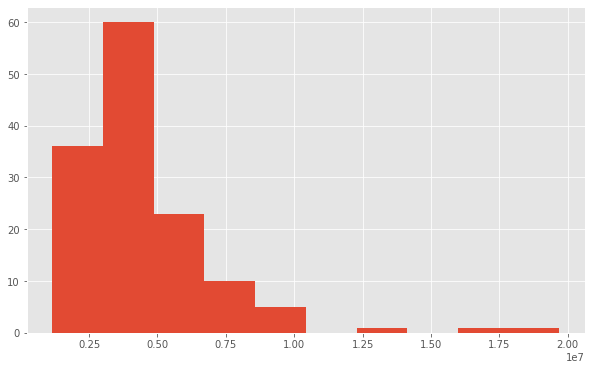

In [53]:
print ("Skew is:", restaurant_data.revenue.skew())
plt.hist(restaurant_data["revenue"])
plt.show()

#**Distribute data using np.log**

skew is 0.30740162838726504


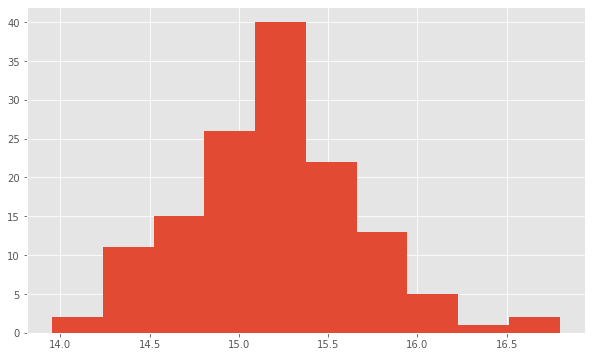

In [54]:
target = np.log(restaurant_data.revenue)
print('skew is', target.skew())
plt.hist(target)
plt.show()

**Preprocess data by dropping null values and including only numeric values**

In [55]:
filtered_data = restaurant_data.select_dtypes(include=[np.number]).interpolate().dropna()

# **Build the multiple linear regression model**

1. **split data into test and train**

2. **fit the model**

3. **Predict the test data** 



In [56]:
X = filtered_data.drop(['revenue', 'Id'], axis=1)
y = np.log(filtered_data.revenue)

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [57]:
# Fit the model
lr = linear_model.LinearRegression()
model_lr = lr.fit(X_train, y_train)

# Predict the test data using model
predictions = model_lr.predict(X_test)



**Evaluate model performance with multiple regression model on all features**

In [58]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
r2 = model_lr.score(X_test, y_test)

# print results
print("Results of Model Evaluation: ")
print("\nMean Absolute error (MAE):", mae)
print("\nMean squared error regression loss (MSE):", mse)
print("\nRoot Mean squared error (RMSE):", rmse)
print("\nR-squared Score:", r2)

Results of Model Evaluation: 

Mean Absolute error (MAE): 0.5802193856635445

Mean squared error regression loss (MSE): 0.6344522415501069

Root Mean squared error (RMSE): 0.796525104155611

R-squared Score: -1.1280520942721401


**Scatter plot for linear regression model including all features**

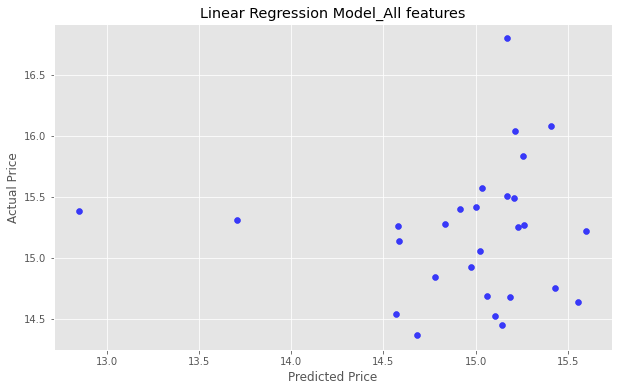

In [59]:
scatter_plot(predictions, y_test, 'Predicted Price', 'Actual Price','Linear Regression Model_All features')

# **3.Find top 5 most correlated features to the target label(revenue) and then build a model on top of those 5 features**

As we can see from the output we got 5 most positive correlation between P2, p28, p6, p21 and p11 columns to target label.

In [60]:
numeric_features = restaurant_data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['revenue'].sort_values(ascending=False)[:6], '\n')

Positive Correlation:
revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
Name: revenue, dtype: float64 



In [61]:
# Build the model
X = filtered_data[['P2', 'P28', 'P6', 'P21', 'P11']]
y = np.log(filtered_data.revenue)

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [62]:
# Fit the model
lr = linear_model.LinearRegression()
model_2 = lr.fit(X_train, y_train)

# Predict the test data using model
predictions = model_2.predict(X_test)

In [63]:
#Model evaluation on 5 most correlated features

# Caluculate MAE, MSE, RMSE and R2 score
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
r2 = model_2.score(X_test, y_test)

# print results
print("Results of Model Evaluation: ")
print("\nMean Absolute error (MAE):", mae)
print("\nMean squared error regression loss (MSE):", mse)
print("\nRoot Mean squared error (RMSE):", rmse)
print("\nR-squared Score:", r2)

Results of Model Evaluation: 

Mean Absolute error (MAE): 0.4194617239443305

Mean squared error regression loss (MSE): 0.2995321167823231

Root Mean squared error (RMSE): 0.5472952738534502

R-squared Score: -0.004677589069639554


**Scatter plot for linear regression model including 5 most correlated columns with target label**

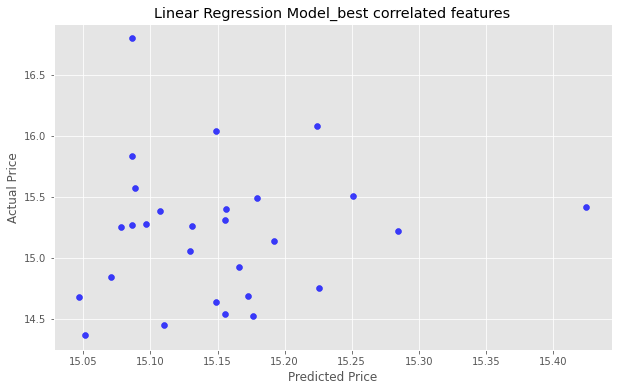

In [64]:
scatter_plot(predictions, y_test, 'Predicted Price', 'Actual Price',
             'Linear Regression Model_best correlated features')

# Comparision: We got better evaluation results than the previous model which includes all the features. Because we only considered most of the correlated variables instead of considering all characteristics.